In [9]:
import pandas as pd
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# from Models.dataset import load_train_data, load_test_data


In [3]:
def load_train_data():
    """
    This function loads a dataset of images from a specified path, resizes the images, 
    and stores them in a pandas DataFrame along with their respective classes.

    The images are categorized into four classes: 'MildDemented', 'ModerateDemented', 
    'NonDemented', and 'VeryMildDemented'. The function iterates through each class, 
    opens and resizes the images, and appends them to a dictionary along with their class.

    The dictionary is then converted into a pandas DataFrame and returned.

    Returns:
        df_train (pd.DataFrame): A DataFrame containing the resized images and their classes.
    """
    
    df_train={'class':[],'image':[]} # create a dictionary to store the dataset

    """# create dataset from the image folder"""

    classes=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
    train_path=''

    for i in classes:
        if i=='MildDemented':
            train_path='../Dataset/train/MildDemented/mildDem'
        elif i=='ModerateDemented':
            train_path='../Dataset/train/ModerateDemented/moderateDem'
        elif i=='NonDemented':
            train_path='../Dataset/train/NonDemented/nonDem'
        else:
            train_path='../Dataset/train/VeryMildDemented/veryMildDem'
        for j in range(100000):
            try:
                img=Image.open(f'{train_path}{j}.jpg')
                df_train['class'].append(i)
                df_train['image'].append(np.array(img.resize((200,200))).reshape(200*200,1))

            except:
                break

    """# save Dataset into a pandas Dataframe"""
    return pd.DataFrame(df_train)

In [5]:
df_train=load_train_data()
print(df_train.head())

          class                                              image
0  MildDemented  [[0], [0], [0], [0], [0], [0], [0], [0], [0], ...
1  MildDemented  [[0], [0], [0], [0], [0], [0], [0], [0], [0], ...
2  MildDemented  [[0], [0], [0], [0], [0], [0], [0], [0], [0], ...
3  MildDemented  [[0], [0], [0], [0], [0], [0], [0], [0], [0], ...
4  MildDemented  [[0], [0], [0], [0], [0], [0], [0], [0], [0], ...


In [12]:
def load_test_data():
    """
    This function loads a dataset of images from a specified path, resizes the images, 
    and stores them in a pandas DataFrame along with their respective classes.

    The images are categorized into four classes: 'MildDemented', 'ModerateDemented', 
    'NonDemented', and 'VeryMildDemented'. The function iterates through each class, 
    opens and resizes the images, and appends them to a dictionary along with their class.

    The dictionary is then converted into a pandas DataFrame and returned.

    Returns:
        df_test (pd.DataFrame): A DataFrame containing the resized images and their classes.
    """
    
    df_test={'class':[],'image':[]} # create a dictionary to store the dataset

    """# create dataset from the image folder"""

    classes=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
    test_path=''

    for i in classes:
        if i=='MildDemented':
            test_path='../Dataset/test/MildDemented/'
        elif i=='ModerateDemented':
            test_path='../Dataset/test/ModerateDemented/'
        elif i=='NonDemented':
            test_path='../Dataset/test/NonDemented/'
        else:
            test_path='../Dataset/test/VeryMildDemented/'
        for filename in os.listdir(test_path):
            if filename.endswith(".jpg"):
                try:
                    img=Image.open(os.path.join(test_path, filename))
                    df_test['class'].append(i)
                    df_test['image'].append(np.array(img.resize((200,200))).reshape(200*200,1))

                except:
                    break

    """# save Dataset into a pandas Dataframe"""
    return pd.DataFrame(df_test)

In [13]:
df_test=load_test_data()
print(df_test.head())

          class                                              image
0  MildDemented  [[0], [0], [0], [0], [0], [0], [0], [0], [0], ...
1  MildDemented  [[0], [0], [0], [0], [0], [0], [0], [0], [0], ...
2  MildDemented  [[0], [0], [0], [0], [0], [0], [0], [0], [0], ...
3  MildDemented  [[0], [0], [0], [0], [0], [0], [0], [0], [0], ...
4  MildDemented  [[0], [0], [0], [0], [0], [0], [0], [0], [0], ...


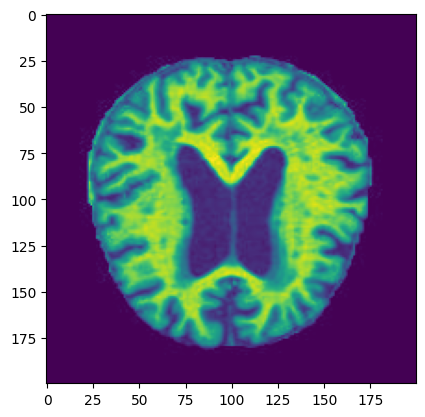

In [16]:
plt.imshow(df_test['image'][1].reshape(200,200))

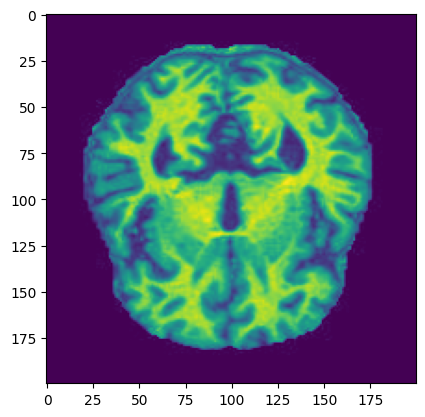

In [6]:
plt.imshow(df_train['image'][49].reshape(200,200))